In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
import os
import re

In [2]:
!pip install squarify

In [10]:
# assign directory
directory = 'C:\\Users\\cheth\\OneDrive\\Professional\\MTech\\PSephology\\UP Elections\\Data Extraction\\1993\\Individual AC Data'

res = pd.DataFrame(columns=['AC_Name','# #','Position','Name','Votes','Votes %','Party'])

# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    name, extension = os.path.splitext(f)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
        df['AC_Name'] = filename.split('.')[0]
        res = res.append(df)
        
res = res.reset_index()

In [11]:
res.head()

index    AC_Name # # Position            Name  Votes Votes %  \
0      0  Afzalgarh   1        6    Abdul Raheem  4,481    2.9%   
1      1  Afzalgarh   2       11      Abdul Sami    295    0.2%   
2      2  Afzalgarh   3       15     Anees Ahmed    225    0.2%   
3      3  Afzalgarh   4       24     Ashok Kumar     93    0.1%   
4      4  Afzalgarh   5       17  Ateequr Rehman    179    0.1%   

             Party    #      
0  Jharkhand Party      NaN  
1      Independent      NaN  
2      Independent      NaN  
3      Independent      NaN  
4      Independent      NaN

In [12]:
#improper_df = res[res['Seats All Party Results'].notnull()]
#improper_df
#improper_df['AC_Name'].unique()

In [13]:
df = res

In [14]:
df.columns[8]

'\xa0\xa0#\xa0\xa0\xa0\xa0'

In [15]:
df = df.drop(['# #', df.columns[8]],axis=1)
df.head()

index    AC_Name Position            Name  Votes Votes %            Party
0      0  Afzalgarh        6    Abdul Raheem  4,481    2.9%  Jharkhand Party
1      1  Afzalgarh       11      Abdul Sami    295    0.2%      Independent
2      2  Afzalgarh       15     Anees Ahmed    225    0.2%      Independent
3      3  Afzalgarh       24     Ashok Kumar     93    0.1%      Independent
4      4  Afzalgarh       17  Ateequr Rehman    179    0.1%      Independent

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9559 entries, 0 to 9558
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9559 non-null   int64 
 1   AC_Name   9559 non-null   object
 2   Position  9559 non-null   object
 3   Name      9559 non-null   object
 4   Votes     9559 non-null   object
 5   Votes %   9559 non-null   object
 6   Party     9559 non-null   object
dtypes: int64(1), object(6)
memory usage: 522.9+ KB


In [17]:
df.isnull().sum()

index       0
AC_Name     0
Position    0
Name        0
Votes       0
Votes %     0
Party       0
dtype: int64

In [18]:
df.sort_values('Position')

index          AC_Name Position                     Name   Votes  \
2927      1         Etmadpur        1      Chandra Bhan Maurya  39,468   
5255     11           Kishni        1          Rameshwar Dayal  39,885   
2966     11        Fakharpur        1           Mayankar Singh  52,604   
7805     14           Rampur        1             M. Azam Khan  40,324   
1640      4          Bidhuna        1           Dani Ram Verma  50,758   
...     ...              ...      ...                      ...     ...   
90       41  Agra Cantonment       72             Mohd. Shahid       9   
120      71  Agra Cantonment       72             Suresh Chand       9   
116      67  Agra Cantonment       75       Shital Prasad Soni       6   
111      62  Agra Cantonment       75  Satendra Prakash Mittal       6   
80       31  Agra Cantonment       77             Kapoor N. C.       5   

     Votes %                  Party  
2927   40.4%        Samajwadi Party  
5255   40.4%        Samajwadi Party  
2966   45.0%  Bharatiya Janta Party  
7805   30.5%        Samajwadi Party  
1640   41.3%        Samajwadi Party  
...      ...                    ...  
90      0.0%            Independent  
120     0.0%            Independent  
116     0.0%            Independent  
111     0.0%            Independent  
80      0.0%            Independent  

[9559 rows x 7 columns]

In [19]:
df.index

RangeIndex(start=0, stop=9559, step=1)

In [20]:
for i, row in df.iterrows():
    val = str(df.at[i, 'Votes'])
    if ',' in val:
        df.at[i, 'Votes'] = df.at[i, 'Votes'].replace(',', '')

In [21]:
df['Votes'] = df['Votes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9559 entries, 0 to 9558
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9559 non-null   int64 
 1   AC_Name   9559 non-null   object
 2   Position  9559 non-null   object
 3   Name      9559 non-null   object
 4   Votes     9559 non-null   int64 
 5   Votes %   9559 non-null   object
 6   Party     9559 non-null   object
dtypes: int64(2), object(5)
memory usage: 522.9+ KB


In [22]:
df_p_1 = df[df['Position']==1.0]
df_p_1

index              AC_Name Position                            Name  \
10       10            Afzalgarh        1                 Inder Dev Singh   
35        9                Agota        1                       Kiran Pal   
106      57      Agra Cantonment        1             Ramesh Kant Lawania   
160      34            Agra East        1             Satya Prakash Vikal   
192      19            Agra West        1                  Ram Babu Harit   
...     ...                  ...      ...                             ...   
9434     16  Varanasi Cantonment        1                        Jyotsana   
9455      1       Varanasi North        1                  Amarnath Yadav   
9501     20       Varanasi South        1  Shyam Dev Rai Chaudhari (Dada)   
9512      7           Zahoorabad        1                  Isteyak Ansari   
9536      5              Zamania        1                Jai Ram Kushwaha   

      Votes Votes %                  Party  
10    61128   39.6%  Bharatiya Janta Party  
35    44741   39.5%             Janata Dal  
106   45444   47.1%  Bharatiya Janta Party  
160   48055   51.1%  Bharatiya Janta Party  
192   49495   47.5%  Bharatiya Janta Party  
...     ...     ...                    ...  
9434  51388   45.0%  Bharatiya Janta Party  
9455  43974   40.5%  Bharatiya Janta Party  
9501  63726   62.3%  Bharatiya Janta Party  
9512  56476   42.1%    Bahujan Samaj Party  
9536  61879   48.1%    Bahujan Samaj Party  

[416 rows x 7 columns]

In [23]:
df_p_1['Votes %'] = df_p_1['Votes %'].str.replace("%","")

In [24]:
df_p_1['Votes %'] = df_p_1['Votes %'].astype('float64')
df_p_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 10 to 9536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     416 non-null    int64  
 1   AC_Name   416 non-null    object 
 2   Position  416 non-null    object 
 3   Name      416 non-null    object 
 4   Votes     416 non-null    int64  
 5   Votes %   415 non-null    float64
 6   Party     416 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 26.0+ KB


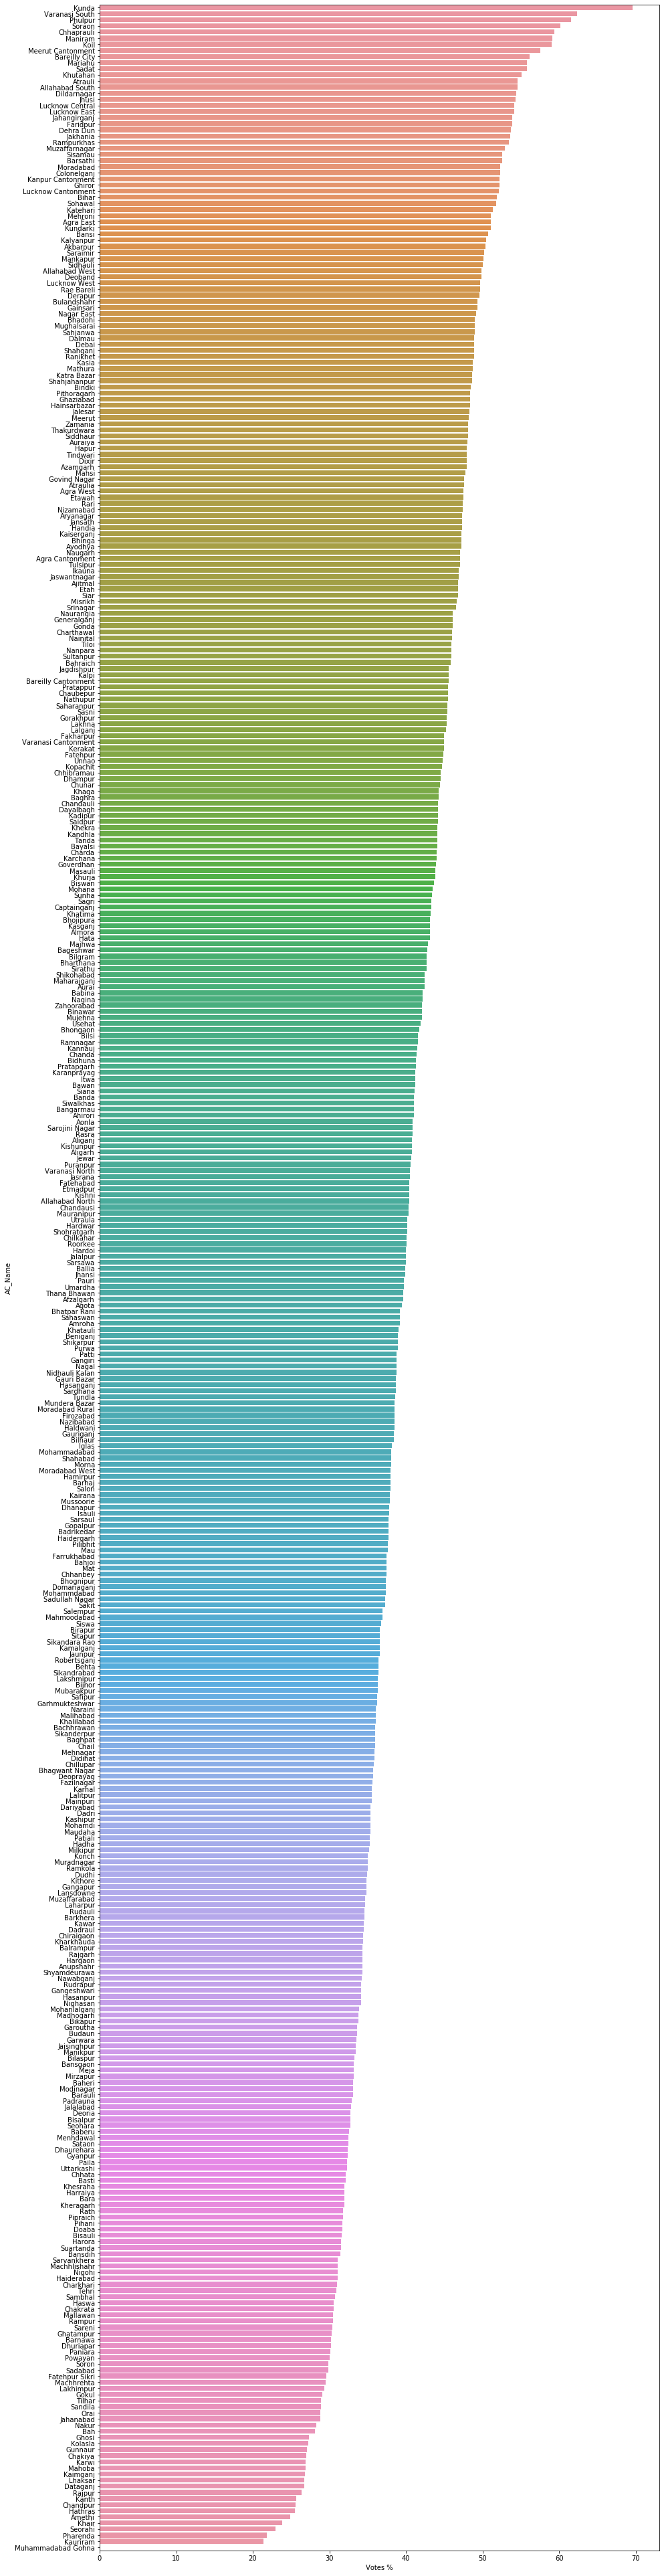

In [25]:
plt.figure(figsize=(15,70))
sns.barplot(x='Votes %', y='AC_Name',data=df_p_1,order=df_p_1.sort_values('Votes %',ascending=False)["AC_Name"],orient="h")
plt.show()

In [26]:
df_c_r = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]
df_c_r.head()

index          AC_Name Position                      Name  Votes Votes %  \
10     10        Afzalgarh        1           Inder Dev Singh  61128   39.6%   
22     22        Afzalgarh        2      Sheikh Mohd. Suleman  54509   35.4%   
35      9            Agota        1                 Kiran Pal  44741   39.5%   
47     21            Agota        2            Virendra Singh  39407   34.8%   
82     33  Agra Cantonment        2  Krishanvir Singh Kaushal  37144   38.5%   

                    Party  
10  Bharatiya Janta Party  
22            Independent  
35             Janata Dal  
47  Bharatiya Janta Party  
82        Samajwadi Party

In [27]:
df_c_r['Votes'] = df_c_r['Votes'].astype('int64')
df_c_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 10 to 9553
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     832 non-null    int64 
 1   AC_Name   832 non-null    object
 2   Position  832 non-null    object
 3   Name      832 non-null    object
 4   Votes     832 non-null    int64 
 5   Votes %   832 non-null    object
 6   Party     832 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.0+ KB


In [28]:
import plotly.express as px
plt.figure(figsize=(12,12))
fig = px.treemap(df_c_r, 
                 path=[px.Constant('all'), 'AC_Name','Party'], 
                 values='Votes',
                 color='Party')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 864x864 with 0 Axes>

In [29]:
df_c_r1 = df_c_r[df_c_r['Position'] == 1.0]
df_c_r1.head()

index          AC_Name Position                 Name  Votes Votes %  \
10      10        Afzalgarh        1      Inder Dev Singh  61128   39.6%   
35       9            Agota        1            Kiran Pal  44741   39.5%   
106     57  Agra Cantonment        1  Ramesh Kant Lawania  45444   47.1%   
160     34        Agra East        1  Satya Prakash Vikal  48055   51.1%   
192     19        Agra West        1       Ram Babu Harit  49495   47.5%   

                     Party  
10   Bharatiya Janta Party  
35              Janata Dal  
106  Bharatiya Janta Party  
160  Bharatiya Janta Party  
192  Bharatiya Janta Party

In [30]:
df_c_r1.sort_values('Votes', ascending=False, inplace=True)
df_c_r1

index        AC_Name Position  \
3662      7   Govind Nagar        1   
6899     36  Muzaffarnagar        1   
3438      6      Ghaziabad        1   
5370     15          Kunda        1   
6208      2         Meerut        1   
...     ...            ...      ...   
4997      1       Kauriram        1   
8560      9        Seorahi        1   
5945      7       Manikpur        1   
500      15         Amethi        1   
2750      2        Didihat        1   

                                              Name  Votes Votes %  \
3662                             Bal Chandra Misra  92493   47.6%   
6899                                 Suresh Sangal  92400   52.9%   
3438                               Baleshwar Tyagi  91199   48.4%   
5370  Kunwar Raghuraj Pratap Singh Urf Raja Bhaiya  89473   69.6%   
6208                                       Akhlakh  80339   48.2%   
...                                            ...    ...     ...   
4997                                  Ambika Singh  25472   21.4%   
8560                             Nand Kishor Misra  25059   23.0%   
5945                              Mannu Lal Kureel  24860   33.4%   
500                                  Jamuna Mishra  23270   24.9%   
2750                              Kashi Singh Airi  22623   35.9%   

                       Party  
3662   Bharatiya Janta Party  
6899   Bharatiya Janta Party  
3438   Bharatiya Janta Party  
5370             Independent  
6208              Janata Dal  
...                      ...  
4997             Independent  
8560   Bharatiya Janta Party  
5945   Bharatiya Janta Party  
500    Bharatiya Janta Party  
2750  Uttar Khand Kranti Dal  

[416 rows x 7 columns]

In [37]:
df_c_r1['Party'].value_counts()

BJP     176
SP      106
BSP      65
INC      28
JD       27
Ind       8
CPI       4
JP        1
UKKD      1
Name: Party, dtype: int64

In [36]:
df_c_r1.replace({'Party': {'Bharatiya Janta Party': 'BJP',
                           'Samajwadi Party': 'SP',
                           'Bahujan Samaj Party':'BSP',
                           'Apna Dal (Soneylal)':'AD',
                           'Indian National Congress':'INC',
                           'Suheldev Bhartiya Samaj Party':'SBSP',
                           'Independent':'Ind',
                           'Ittehad-E-Millait Council':'IC',
                           'Nirbal Indian Shoshit Hamara Aam Dal':'NISHAD',
                           'Nationalist Congress Party': 'NCP',
                           'Rashtriya Lok Dal':'RLD',
                           'Peace Party' : 'PP',
                           'Quami Ekta Dal': 'QED',
                           'Akhil Bhartiya Lok Tantrik Congress':'ABLTC',
                           'Rashtriya Kranti Party':'RKP',
                           'Janata Dal (United)':'JDU',
                           'Communist Party Of India (MARXIST)':'CPI',
                           'Rashtriya Parivartan Dal':'RPD',
                           'Akhil Bharat Hindu Mahasabha':'ABHM',
                           'Lok Jan Shakti Party':'LJSP',
                           'Samajwadi Janata Party (RASHTRIYA)':'SJPR',
                           'National Loktantrik Party':'NLP',
                           'Jharkhand Party':'JP',
                           'Janata Dal':'JD',
                           'Communist Party Of India':'CPI',
                           'Uttar Khand Kranti Dal':'UKKD'
                           
                          }},inplace=True)

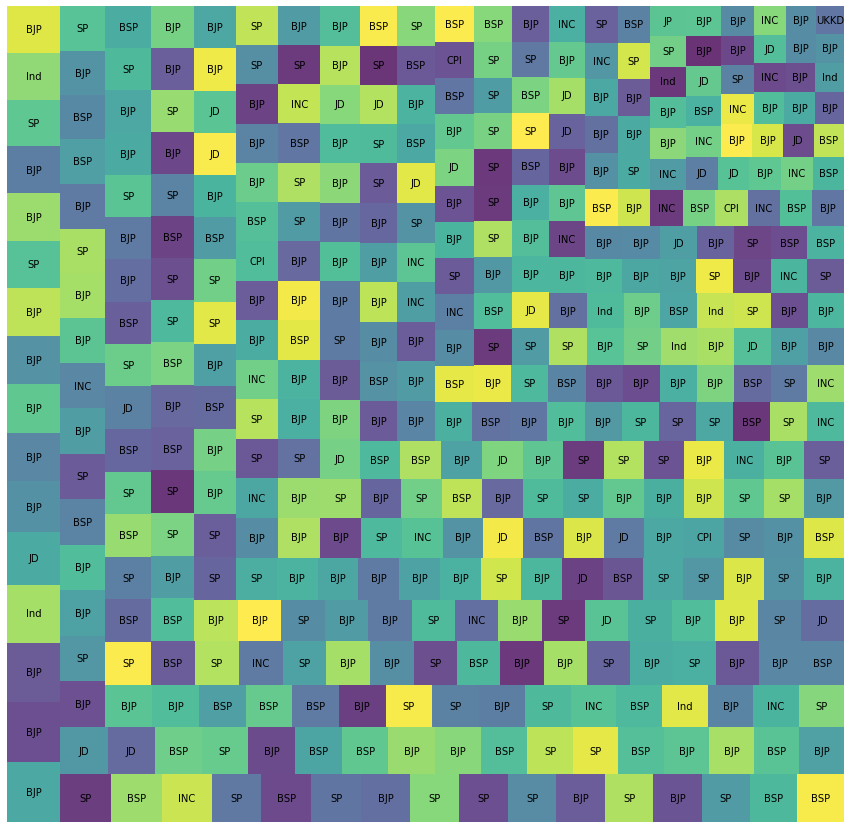

In [38]:
fig, ax = plt.subplots(1, figsize = (15,15))
squarify.plot(sizes=df_c_r1['Votes'], 
              label=df_c_r1['Party'],
              alpha=.8 )
plt.axis('off')
plt.show()

In [39]:
df_final = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]

In [40]:
df_final.sort_values(['AC_Name', 'Votes'], inplace=True)
df_final['diffs'] = df_final.groupby('AC_Name')['Votes'].diff()
df_final['diffs'] = df_final['diffs'].fillna(value=0)

In [41]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_final, 
                 path=[px.Constant('all'), 'Party','AC_Name'], 
                 values='diffs',
                 color='Party',
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [42]:
X = df_final[df_final['diffs'] > 0]['diffs'].unique()
X = X.reshape(-1, 1)

In [43]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[0 0 3 2 2 3 0 1 3 0 3 2 3 0 0 0 3 0 0 2 2 3 3 3 2 0 0 3 3 0 3 0 0 0 3 3 3
 0 0 3 3 0 2 3 3 3 2 3 3 0 1 0 3 2 3 3 2 3 0 2 0 0 0 2 0 2 3 0 3 3 0 0 3 2
 0 0 0 3 0 3 1 3 0 0 3 0 0 0 0 0 0 0 3 1 0 3 3 0 0 3 1 2 0 1 3 0 2 2 3 1 0
 0 2 0 0 0 0 0 1 3 0 3 0 0 3 0 0 2 0 3 3 0 0 0 2 3 0 0 3 0 0 0 3 0 0 1 1 0
 3 2 3 2 3 1 0 3 3 0 0 3 2 0 2 0 3 3 0 0 0 0 3 0 0 0 3 3 3 3 0 0 2 0 2 3 3
 3 0 3 0 3 3 0 2 3 0 3 3 2 1 2 3 3 2 0 0 2 3 0 2 0 3 1 2 0 0 3 2 0 0 0 3 3
 3 0 3 3 1 0 0 0 1 0 0 2 1 2 3 0 2 3 3 2 0 0 2 2 2 3 0 0 3 2 0 0 0 0 3 0 0
 1 2 1 2 0 3 3 0 0 0 1 3 2 3 3 0 0 2 3 0 3 3 3 0 3 3 0 0 2 3 2 2 3 0 0 3 2
 2 2 0 0 0 3 3 2 3 3 0 0 0 0 2 0 0 0 0 0 2 0 0 1 3 2 0 0 0 3 2 2 0 1 3 0 0
 0 0 2 3 2 0 0 0 2 0 0 0 1 3 0 1 3 3 3 2 3 3 0 0 0 2 3 0 2 3 2 0 2 0 0 0 0
 3 3 3 3 3 0 3 2 0 2 2 0 0 3 2 0 0 3 3 1 3 3 3 3 3 2 0 3 3 0 3 2 3 0 0 0 3
 2 0 3 0 1 3 2]


In [44]:
df1 = pd.DataFrame(X)
df1['label'] = label
df1.rename(columns={0: 'diffs'}, inplace=True)

No handles with labels found to put in legend.


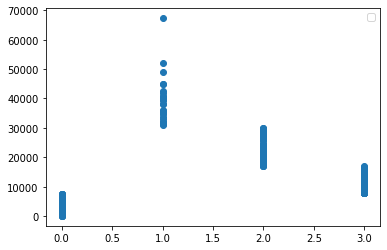

In [45]:
plt.scatter(df1['label'], df1['diffs'])
plt.legend()
plt.show()

In [46]:
df_res = pd.merge(df1, df_final, how='left', on='diffs')

In [47]:
df_res.shape

(416, 9)

In [48]:
df_res['label'] = df_res.label.map({1.0:'Safe',
                2.0:'Safe',
                3.0:'Favorable',
                0.0:'Battle-Ground'})
df_res

diffs          label  index              AC_Name Position  \
0     6619.0  Battle-Ground     10            Afzalgarh        1   
1     5334.0  Battle-Ground      9                Agota        1   
2     8300.0      Favorable     57      Agra Cantonment        1   
3    23756.0           Safe     34            Agra East        1   
4    21645.0           Safe     19            Agra West        1   
..       ...            ...    ...                  ...      ...   
411  16000.0      Favorable     16  Varanasi Cantonment        1   
412   7278.0  Battle-Ground      1       Varanasi North        1   
413  39505.0           Safe     20       Varanasi South        1   
414  12986.0      Favorable      7           Zahoorabad        1   
415  29646.0           Safe      5              Zamania        1   

                               Name  Votes Votes %                  Party  
0                   Inder Dev Singh  61128   39.6%  Bharatiya Janta Party  
1                         Kiran Pal  44741   39.5%             Janata Dal  
2               Ramesh Kant Lawania  45444   47.1%  Bharatiya Janta Party  
3               Satya Prakash Vikal  48055   51.1%  Bharatiya Janta Party  
4                    Ram Babu Harit  49495   47.5%  Bharatiya Janta Party  
..                              ...    ...     ...                    ...  
411                        Jyotsana  51388   45.0%  Bharatiya Janta Party  
412                  Amarnath Yadav  43974   40.5%  Bharatiya Janta Party  
413  Shyam Dev Rai Chaudhari (Dada)  63726   62.3%  Bharatiya Janta Party  
414                  Isteyak Ansari  56476   42.1%    Bahujan Samaj Party  
415                Jai Ram Kushwaha  61879   48.1%    Bahujan Samaj Party  

[416 rows x 9 columns]

In [49]:
df_second = df_final[df_final['Position'] == 2]
dict_cols = {'Name':'2_Name', 'Votes':'2_Votes', 'Votes %': '2_Votes %', 'Party':'2_party'}
df_second.rename(columns=dict_cols, inplace=True)
df_second = df_second[['AC_Name', '2_Name', '2_Votes', '2_Votes %', '2_party']].sort_values('AC_Name')
df_second.head()

AC_Name                    2_Name  2_Votes 2_Votes %  \
22         Afzalgarh      Sheikh Mohd. Suleman    54509     35.4%   
47             Agota            Virendra Singh    39407     34.8%   
82   Agra Cantonment  Krishanvir Singh Kaushal    37144     38.5%   
150        Agra East         Om Prakash Jindal    24299     25.8%   
199        Agra West       Virendra Singh Soni    27850     26.8%   

                      2_party  
22                Independent  
47      Bharatiya Janta Party  
82            Samajwadi Party  
150  Indian National Congress  
199       Bahujan Samaj Party

In [50]:
df_res = df_res.sort_values('AC_Name')
df_res.head()

diffs          label  index          AC_Name Position  \
0   6619.0  Battle-Ground     10        Afzalgarh        1   
1   5334.0  Battle-Ground      9            Agota        1   
2   8300.0      Favorable     57  Agra Cantonment        1   
3  23756.0           Safe     34        Agra East        1   
4  21645.0           Safe     19        Agra West        1   

                  Name  Votes Votes %                  Party  
0      Inder Dev Singh  61128   39.6%  Bharatiya Janta Party  
1            Kiran Pal  44741   39.5%             Janata Dal  
2  Ramesh Kant Lawania  45444   47.1%  Bharatiya Janta Party  
3  Satya Prakash Vikal  48055   51.1%  Bharatiya Janta Party  
4       Ram Babu Harit  49495   47.5%  Bharatiya Janta Party

In [52]:
df_res.shape 
df_second.shape 

(416, 5)

In [53]:
df_res = pd.merge(df_res, df_second, how='inner', on='AC_Name')

In [54]:
df_res.to_excel('1993_Analysis_1.xlsx')

In [55]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_res, 
                 path=[px.Constant('all'), 'Party','AC_Name','label'], 
                 values='diffs',
                 color='label',
                 color_discrete_map={'Safe':'#BCEE68', 'Favorable':'#00EEEE', 'Battle-Ground':'#EE4000'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 1440x1440 with 0 Axes>